<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])
################################################## 1
['cat3.png', 'cat1.png', 'cat2.png']


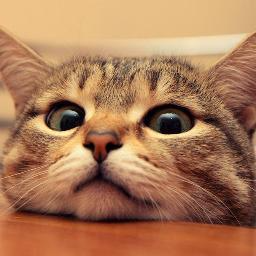

(256, 256, 3)
uint8


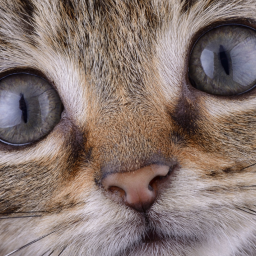

(256, 256, 3)
uint8


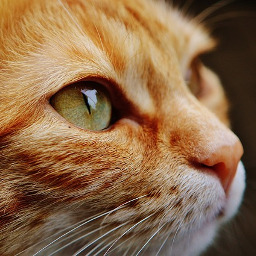

(256, 256, 3)
uint8
torch.Size([3, 3, 256, 256])
################################################## 2
torch.float32
torch.Size([3, 3, 256, 256])
3
tensor(0.5799) tensor(0.2212)
tensor(0.4493) tensor(0.2068)
tensor(0.3554) tensor(0.1931)


In [7]:
import os
import imageio.v2 as imageio
import torch


# image path 로드
img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))

print(type(img_arr))
print(img_arr.shape)
print(img_arr.dtype)

# numpy -> tensor
img = torch.from_numpy(img_arr)
# tensor 순서 변화 (numpy는 높이, 너비, 채널로 되어 있음)
out = img.permute(2, 0, 1)
print(out.shape)

print("#" * 50, 1)


data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
# 상단 폴더에 있는 모든 png 파일 로드
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
]
print(filenames)

from PIL import Image


# enumerate로 리스트 인덱스와 인덱스 내 파일 이름 읽기
for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))
  image.show()
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  print(img_arr.shape)
  print(img_arr.dtype)

# 배치 사이즈 설정 후
# 아래 텐서 크기로 0 채워진 텐서 생성
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2, 0, 1)
  batch[i] = img_t

print(batch.shape)

print("#" * 50, 2)

batch = batch.float()
# 배치 노말라이제이션
batch /= 255.0
print(batch.dtype)
print(batch.shape)

n_channels = batch.shape[1]

print(n_channels)

for c in range(n_channels):
  # 모든 이미지에서 빨간색, 초록색, 파란색의 평균
  mean = torch.mean(batch[:, c])
  # 모든 이미지에서 빨간색, 초록색, 파란색의 표준 편차
  std = torch.std(batch[:, c])
  print(mean, std)
  # 정규 분포화
  batch[:, c] = (batch[:, c] - mean) / std
